In [1]:
import pandas as pd 
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open('4_column_plot_data.pkl', 'rb') as file:
    results = pickle.load(file)

In [3]:
df = pd.DataFrame(results)
df

,data,method,ci_mean,ci_low_95,ci_high_95
0,afib,proximal,1.326186,1.233509,1.412074
1,afib,baseline,1.694353,1.618803,1.746905
2,afib,backdoor,1.648553,1.619575,1.680126
3,heart,proximal,1.267184,1.161252,1.382979
4,heart,baseline,1.581546,1.527569,1.628814
5,heart,backdoor,1.518746,1.493133,1.545630
6,kidney,proximal,1.408189,1.245608,1.520294
7,kidney,baseline,1.412324,1.364562,1.448942
8,kidney,backdoor,1.412592,1.386521,1.441816
9,afib,flan-t5,1.614488,1.577330,1.648558


In [4]:
data_order = ["afib", "heart", "kidney"]
data_labels_clean = ["Est. ACE for "+x for x in ["A-fib", "Heart", "Kidney"]] 
method_order = ["baseline", "backdoor", "flan-t5", "proximal"]
method_order_clean_labels = ["Baseline:\n $W, Z$ Random", "$W$ Backdoor", "P1M", "P2M"]
true_ace = 1.3

In [5]:
# Manually adding data and methods that passed OR test 
OR_test_results = {
    ("afib", "baseline"): "Neutral", 
    ("afib", "backdoor"): "Neutral", 
    ("afib", "flan-t5"): "Failed", 
    ("afib", "proximal"): "Passed",
    
    ("heart", "baseline"): "Neutral", 
    ("heart", "backdoor"): "Neutral", 
    ("heart", "flan-t5"): "Failed", 
    ("heart", "proximal"): "Passed",
    
    ("kidney", "baseline"): "Neutral", 
    ("kidney", "backdoor"): "Neutral", 
    ("kidney", "flan-t5"): "Failed", 
    ("kidney", "proximal"): "Failed",
}

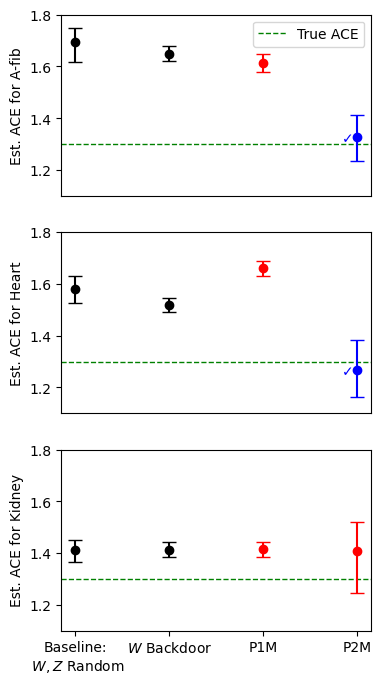

In [14]:
fig, axs = plt.subplots(3, 1, figsize=(4, 8))
for ax_no, ax in enumerate(axs):
    data_kind = data_order[ax_no]
    data_subset = df.loc[df["data"] == data_kind]
    
    #Y-label 
    ax.set_ylabel(data_labels_clean[ax_no])
    
    #Put in the true value 
    ax.axhline(y=true_ace, color='green', linewidth=1, label="True ACE", linestyle='--')
    
    #Other cleanup
    ax.set_ylim(1.1, 1.8)
    
    for method_no in range(len(method_order)): 
        method_kind = method_order[method_no]
        method_subset = data_subset.loc[data_subset["method"] == method_kind]
        mean = method_subset["ci_mean"].iloc[0]
        lower = method_subset["ci_low_95"].iloc[0]
        upper = method_subset["ci_high_95"].iloc[0]
        error = np.array([mean - lower, upper - mean]).reshape(-1, 1)
        
        
        OR_result = OR_test_results[(data_kind, method_kind)]
        if OR_result == "Passed": 
            bar_color = 'blue'
            # Add a star if passed
            ax.text(method_no-0.05, mean, '$\checkmark$', horizontalalignment='right', verticalalignment='center', color='blue')
        elif OR_result == "Failed":
            bar_color = 'red'
        elif OR_result == "Neutral": 
            bar_color = 'black'
        
        ax.errorbar(method_no, mean, yerr=error, fmt='o', capsize=5, color=bar_color)
        
        
    if ax_no == 0: 
        ax.legend()
        
    # Put in xtick labels for the last one but not others
    if ax_no == len(data_order)-1:
        ax.set_xticks([0, 1, 2, 3])
        ax.set_xticklabels(method_order_clean_labels)
    else: 
        ax.set_xticks([])
        ax.set_xticklabels([])